# Whisper Model

# Approach

- Scaled to 680,000 hours of multilingual and multitask supervision (labeled audio data).

- It was designed to remove the need for any dataset-specific fine-tuning to achieve high-quality results.

- 117,000 hours of training audio covered 96 languages other than English.

- 125,000 hours of the dataset was dedicated to X -> en translation.

- Model achieves high results w/o need for self-supervision or self-training techniques.

- Models are trained to predict raw text from transcripts.

- Datasets are constructed from audio paired with transcripts on the Internet, resulting in a diverse dataset that encompasses a broad distribution of domains and languages.

- Several automated filtering methods are used to improve transcript quality from the raw dataset.

- Heuristics were developed to remove machine-created transcripts since many transcripts on the Internet are generated by ASR systems.

- An audio language detector was used . Created by fine-tuning a prototype model trained on prototyped dataset. If (audio,transcript) pair matched then it was used as a training example in the dataset for Whisper, otherwise it was removed, unless the transcript was in English it was used as a training example for the translation (X-> en) dataset.
- Audio files were broken into 30-second segments paired with the subset transcript of the corresponding audio segment.

- Whisper is trained entirely on audio datasets, including segments with no audio, and uses the segments as training data for voice activity detection.

# Model 

- Utilizes an encoder-decoder Transformer architecture (scales reliably).

- Audio is re-sampled to 16,000 Hz and a log-magnitude Mel spectrogram representation is computed. Essentially a log-magnitude Mel spectrogram captures the audio input, filters it, then compresses it for analysis.

- Input features are scaled between -1 and 1 for normalization.

- The encoder consists of two convolutional layers and the GELU activation function  processes the input.

- The final output from the input layer is also normalized.

- The encoder’s (reader)  objective is to understand each word in the given sentence. It pays keen attention to important words within the sentence to draw better context and semantics from it. It will then summarize what it has learnt and pass it on to the decoder (writer).

- The decoder will take the encoder’s summary and write a translated version of it, all while taking into consideration the original sentence, ensuring to keep its integrity (cross-attention). The decoder’s translation is then converted from numbers (tokens) to words.

- Positional encoding is utilized  to add special markers to each word to allow the computer ‘know’ the ordering in which words should appear in a sentence, for syntactic integrity.

- The multitasking training format is utilized to pass a sequence of tokens to the decoder, specifying the tasks to be performed. Tasks include: transcribing, translating, voice activity detection and language identification.


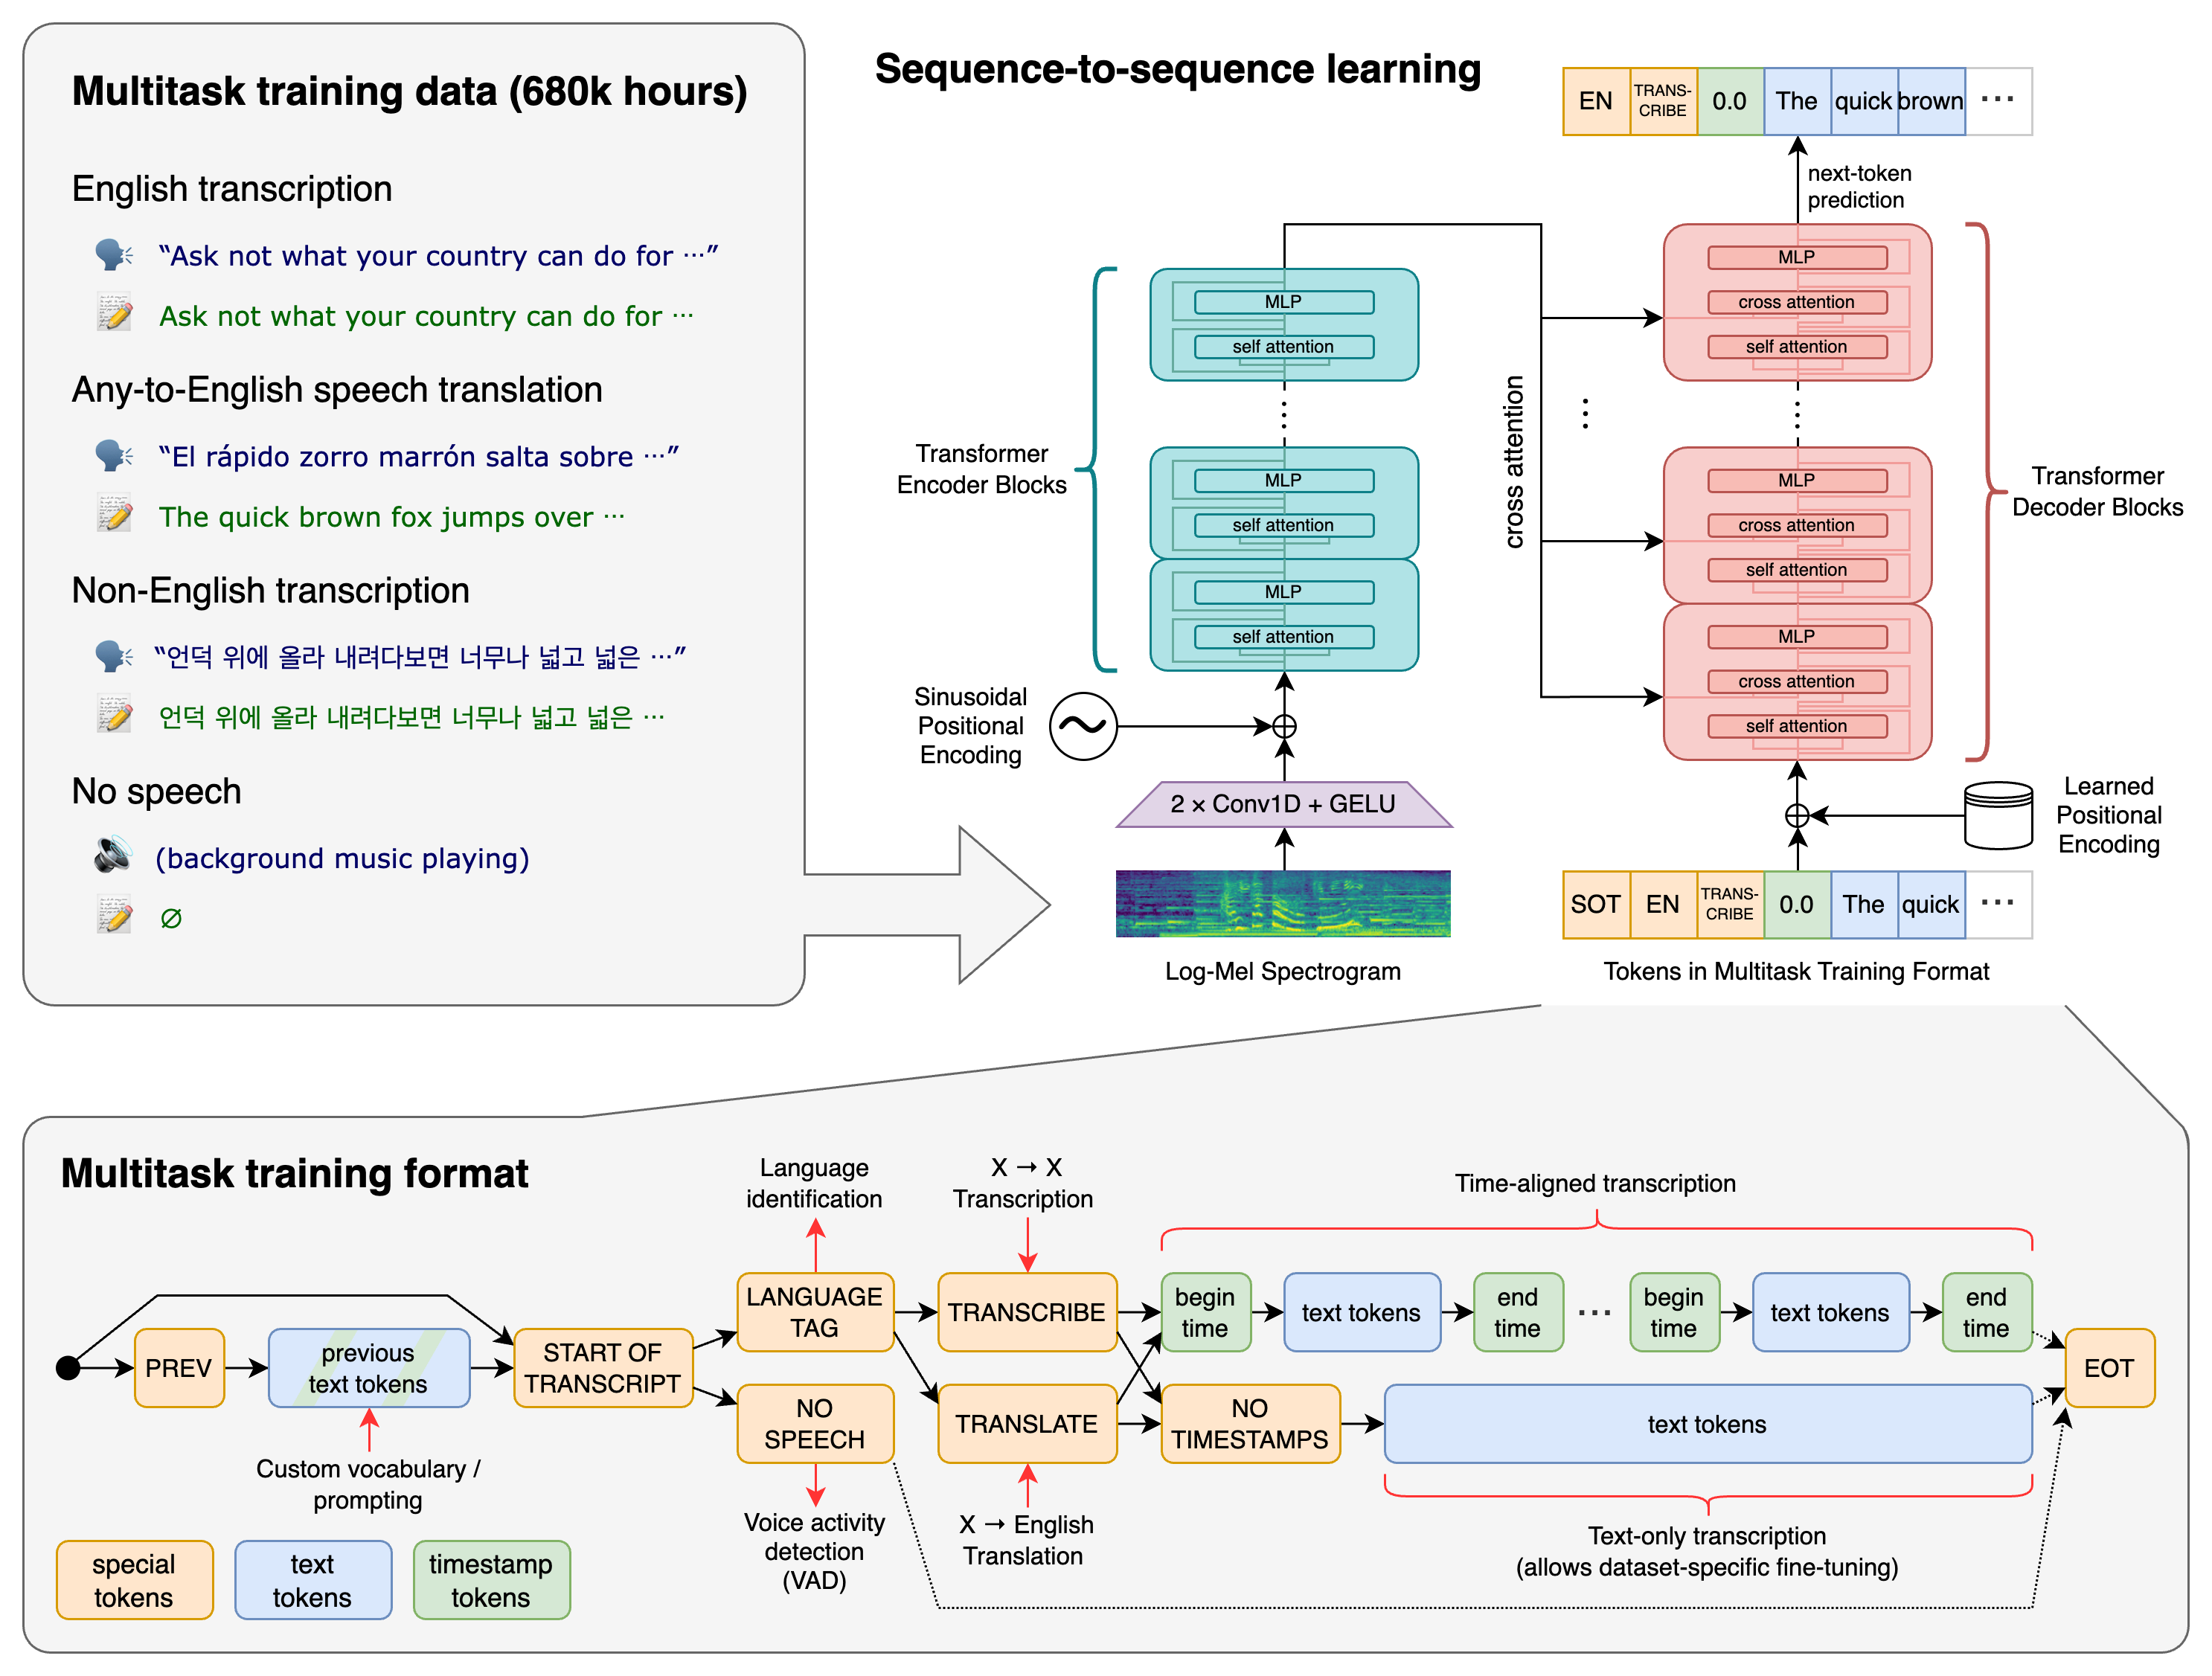

# Reference

Alec Radford, Jong Wook Kim, Tao Xu, Greg Brockman, Christine McLeavey, and Ilya Sutskever. 2023. Robust speech recognition via large-scale weak supervision. In Proceedings of the 40th International Conference on Machine Learning (ICML'23), Vol. 202. JMLR.org, Article 1182, 28492–28518.

# Implementation

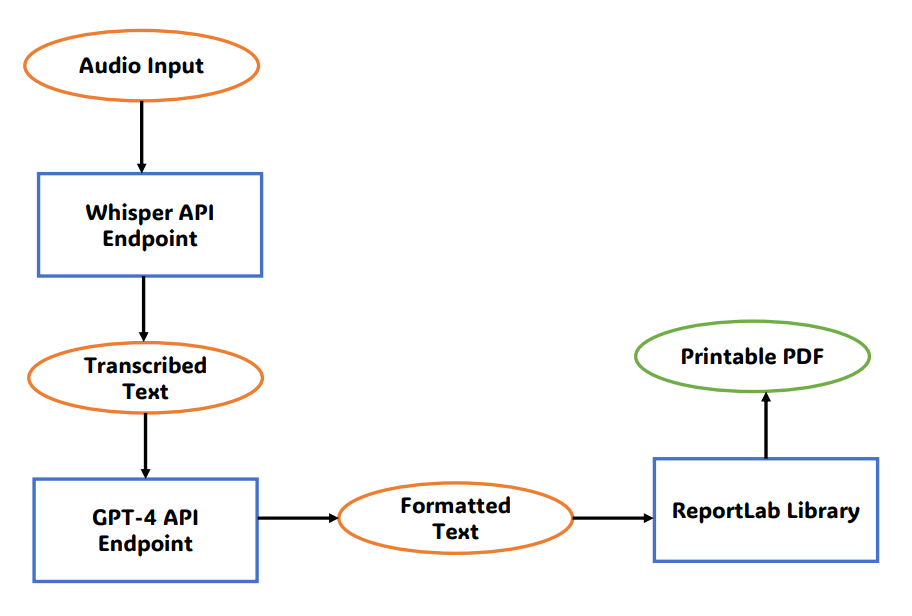

In [4]:
pip install openai

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install reportlab

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install openai==0.28


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade openai


In [10]:
import json
import openai

In [23]:
# Load api key from the config file
with open('C://Users//Student//Documents//New folder//config1.json', 'r') as config_file:
    config_data = json.load(config_file)

openai.api_key = config_data.get("API_KEY")
audio_file= open("C://Users//Student//Downloads//sample3.mp3", "rb")
form = "Patient Name:, Date of visit:, Medical Record Number:, Reason for visit:, Examination and Diagnosis:, Treatment:, Plan:, Attending Physician"
transcript = openai.Audio.transcribe(model="whisper-1", 
                                     file=audio_file,
                                    prompt=f"'{form}'")
print(transcript.text)

Our patient is Mr. Lyle, in for a scheduled appointment. He's a 36-year-old Caucasian male who's had a 7-day history of headache post head-to-head collision during a soccer game. He did not seek immediate treatment for this incident. However, after several days of ongoing headache, he scheduled this appointment. He denies any post-history of concussion or head trauma and stated that before the incident, he was feeling well, taking no medication, and had no chronic diagnosed health conditions. Upon physical examination, Mr. Lyle is a man appearing his stated age, well-groomed, and dressed appropriately for the occasion and season. His vital signs were temperature 36.8 degrees, respiratory rate 16, blood pressure 122 over 84, heart rate 77, oxygen saturation 99% on room air. His neurological exam showed that he was awake, alert, and oriented times three. His cranial nerves were tested and normal bilaterally. His motor system showed no involuntary movements, tics, or fasciculations. He ha

In [24]:
with open('C://Users//Student//Documents//New folder//config1.json', 'r') as config_file:
    config_data = json.load(config_file)

openai.api_key = config_data.get("API_KEY")
audio_file= open("C://Users//Student//Documents//Sound Recordings//Recording.m4a", "rb")
form = "Patient Name:, Date of visit:, Medical Record Number:, Reason for visit:, Examination and Diagnosis:, Treatment:, Plan:, Attending Physician"
transcript1 = openai.Audio.transcribe(model="whisper-1", 
                                     file=audio_file,
                                    prompt=f"'{form}'")
print(transcript1.text)

The patient name is Daniel Clark. The date he was admitted is on the 14th of the 9th, 2023. His medical record number is MRN 11223. The subjective is that the report sudden onset of severe abdominal pain. What was observed and the examination was abdominal ultrasound shows gallstones. His assessment was acute cholecystitis and the plan is to schedule a laparoscopic cholecystectomy and his attended physician is Dr. Sophia Rodriguez.


In [28]:
# Load api key from the config file
with open('C://Users//Student//Documents//New folder//config1.json', 'r') as config_file:
    config_data = json.load(config_file)

openai.api_key = config_data.get("API_KEY")
completion = openai.ChatCompletion.create(
  model="gpt-4",
  messages=[
    {"role": "system", "content": "You are a text formatter for patient medical reports. Format the above text as follows. Put the Patient name: , Date of Visit: , and Medical Record Number: in a separate line at the top of the page. Place <br/> after each entry. Then place <br/>\n. Create a heading called Subjective. Under this heading summarize the reason for the patient visit and the patient symptoms.  Create a second heading called Observation. Under this heading summarize the physical signs of the patient and any examination checking patient symptoms on the patient. Create a third heading called assessment. Summarize what the diagnosis is or what it is believed to be. List the summary in bullet points. Create a last heading called Plan.  Summarize the treatment options for the patient. Put each heading: Subjective, Observation, Assessment and Plan between <br/><br/>:\n, for example, <br/>Subjective<br/>:\n Before and after each bullet point place <br/>. A bullet point is represented when an hyphen starts the sentence "},
    {"role": "user", "content": f"{transcript.text}"}
  ],
    temperature=0
)
patientReport = completion.choices[0].message.content
print(patientReport)

Patient name: Mr. Lyle<br/>
Date of Visit: Not specified<br/>
Medical Record Number: Not specified<br/>

<br/>Subjective<br/>
- Mr. Lyle, a 36-year-old Caucasian male, visited due to a 7-day history of headache following a head-to-head collision during a soccer game. 
- He did not seek immediate treatment post-incident but scheduled an appointment after several days of ongoing headache. 
- He denies any history of concussion or head trauma and reported feeling well before the incident, with no chronic diagnosed health conditions.<br/>

<br/>Observation<br/>
- Mr. Lyle appeared his stated age, well-groomed, and appropriately dressed. 
- His vital signs were within normal range. 
- Neurological examination showed he was awake, alert, and oriented. 
- His cranial nerves, motor system, sensory system, and coordination were all normal. 
- His head, eye, ear, nose, throat exam showed a 2 by 2 centimeter area of tenderness at the left lateral frontal parietal junction area, but no other abnor

In [29]:
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph
from reportlab.lib.styles import getSampleStyleSheet

fileName = "tests/complex-reg-bullet02.pdf"
document = SimpleDocTemplate(fileName, pagesize=letter)

# Set margins (left, right, top, bottom)
left_margin = 50
right_margin = 50
top_margin = 50
bottom_margin = 50

# Define your content
content = []

sample_text = patientReport
# sample_text = "Patient Name: Lisa Brown<br/>"\
#               "Date of Visit: November 6, 2023<br/>"\
#               "Medical Record Number: 54321-0987<br/><br/>"\
#               "Reason for visit: Ms. Brown visited the clinic today with complaints of a persistent cough, sore throat, and nasal congestion. She mentioned that she has been experiencing these symptoms for the past week and they seem to be worsening.<br/><br/>"\
#               "Examination and Diagnosis: Upon examination, Ms. Brown showed signs of an upper respiratory tract infection. Her throat was red and inflamed, with significant nasal congestion. Based on her symptoms and clinical presentation, she has been diagnosed with acute viral pharyngitis, which is a common infection causing throat inflammation.<br/><br/>"\
#               "Treatment: Ms. Brown has been advised to rest, stay hydrated, and gargle with warm salt water to alleviate throat discomfort. Over-the-counter pain relievers and throat lozenges have been recommended for symptomatic relief. Antibiotics were not prescribed as the infection is viral in nature.<br/><br/>"\
#               "Plan: The patient was instructed to monitor her symptoms and determine if they worsen, or if she develops a high fever. She was also advised to avoid close contact with others to prevent the spreading of the infection. A sick note was provided for her employer, recommending a few days off work to facilitate recovery.<br/><br/>"\
#               "Attending Physician: Dr. Sarah Johnson, MD"


# Create a paragraph style
styles = getSampleStyleSheet()
paragraph_style = styles['Normal']

# Add the text to the content list
content.append(Paragraph(sample_text, paragraph_style))

# Build the PDF document with margins and borders
document.build(content)

print(f"'{fileName}' created succefully.......")

# canvas = Canvas(, pagesize = LETTER)
# canvas.drawString(72, 500, transcript.text)
# canvas.save()

'tests/complex-reg-bullet02.pdf' created succefully.......


In [14]:
# Load api key from the config file
with open('C://Users//Student//Documents//New folder//config1.json', 'r') as config_file:
    config_data = json.load(config_file)

openai.api_key = config_data.get("API_KEY")
completion = openai.ChatCompletion.create(
  model="gpt-4",
  messages=[
    {"role": "system", "content": "You are a text formatter for patient medical reports. Format the above text as follows. Put the patient's name, date of visit, and medical record number in a separate line at the top of the page. Place <br/> after each entry. Then place <br/>\n. Create a heading called Subjective. Under this heading summarize the reason for the patient visit and the patient symptoms.  Create a second heading called Observation. Under this heading summarize the physical signs of the patient and any examination checking patient symptoms on the patient. Create a third heading called assessment. Summarize what the diagnosis is or what it is believed to be. List the summary in bullet points. Create a last heading called Plan.  Summarize the treatment options for the patient. Put each heading: Subjective, Observation, Assessment and Plan between <br/><br/>:\n, for example, <br/>Subjective<br/>:\n Before and after each bullet point place <br/>. A bullet point is represented when an hyphen starts the sentence "},
    {"role": "user", "content": f"{transcript.text}"}
  ],
    temperature=0
)
patientReport = completion.choices[0].message.content
print(patientReport)

Patient's Name: Mr. Lyle<br/>
Date of Visit: Not specified<br/>
Medical Record Number: Not specified<br/>

<br/>Subjective<br/>
- Mr. Lyle, a 36-year-old Caucasian male, visited due to a 7-day history of headache following a head-to-head collision during a soccer game.<br/>
- He did not seek immediate treatment post-incident but scheduled an appointment after several days of ongoing headache.<br/>
- He denies any history of concussion or head trauma and was feeling well before the incident.<br/>
- He has no chronic diagnosed health conditions and was not on any medication prior to the incident.<br/>

<br/>Observation<br/>
- Mr. Lyle appeared his stated age, well-groomed, and dressed appropriately.<br/>
- His vital signs were normal: temperature 36.8 degrees, respiratory rate 16, blood pressure 122 over 84, heart rate 77, oxygen saturation 99% on room air.<br/>
- Neurological exam showed he was awake, alert, and oriented times three.<br/>
- His cranial nerves, motor system, sensory syst

In [30]:
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph
from reportlab.lib.styles import getSampleStyleSheet

fileName = "tests/trial4_withbreaksbullets.pdf"
document = SimpleDocTemplate(fileName, pagesize=letter)

# Set margins (left, right, top, bottom)
left_margin = 50
right_margin = 50
top_margin = 50
bottom_margin = 50

# Define your content
content = []

sample_text = patientReport
# sample_text = "Patient Name: Lisa Brown<br/>"\
#               "Date of Visit: November 6, 2023<br/>"\
#               "Medical Record Number: 54321-0987<br/><br/>"\
#               "Reason for visit: Ms. Brown visited the clinic today with complaints of a persistent cough, sore throat, and nasal congestion. She mentioned that she has been experiencing these symptoms for the past week and they seem to be worsening.<br/><br/>"\
#               "Examination and Diagnosis: Upon examination, Ms. Brown showed signs of an upper respiratory tract infection. Her throat was red and inflamed, with significant nasal congestion. Based on her symptoms and clinical presentation, she has been diagnosed with acute viral pharyngitis, which is a common infection causing throat inflammation.<br/><br/>"\
#               "Treatment: Ms. Brown has been advised to rest, stay hydrated, and gargle with warm salt water to alleviate throat discomfort. Over-the-counter pain relievers and throat lozenges have been recommended for symptomatic relief. Antibiotics were not prescribed as the infection is viral in nature.<br/><br/>"\
#               "Plan: The patient was instructed to monitor her symptoms and determine if they worsen, or if she develops a high fever. She was also advised to avoid close contact with others to prevent the spreading of the infection. A sick note was provided for her employer, recommending a few days off work to facilitate recovery.<br/><br/>"\
#               "Attending Physician: Dr. Sarah Johnson, MD"


# Create a paragraph style
styles = getSampleStyleSheet()
paragraph_style = styles['Normal']

# Add the text to the content list
content.append(Paragraph(sample_text, paragraph_style))

# Build the PDF document with margins and borders
document.build(content)

print(f"'{fileName}' created successfully.......")

# canvas = Canvas(, pagesize = LETTER)
# canvas.drawString(72, 500, transcript.text)
# canvas.save()

'tests/trial4_withbreaksbullets.pdf' created succefully.......


In [19]:
# Load api key from the config file
with open('C://Users//Student//Documents//New folder//config1.json', 'r') as config_file:
    config_data = json.load(config_file)

openai.api_key = config_data.get("API_KEY")
completion = openai.ChatCompletion.create(
  model="gpt-4",
  messages=[
    {"role": "system", "content": "You are a text formatter for patient medical reports. Format the above text as follows. Put the Patient name: , Date of Visit: , and Medical Record Number: in a separate line at the top of the page. Place <br/> after each entry. Then place <br/>\n. Create a heading called Subjective. Under this heading summarize the reason for the patient visit and the patient symptoms.  Create a second heading called Observation. Under this heading summarize the physical signs of the patient and any examination checking patient symptoms on the patient. Create a third heading called assessment. Summarize what the diagnosis is or what it is believed to be. List the summary in bullet points. Create a last heading called Plan.  Summarize the treatment options for the patient. Put each heading: Subjective, Observation, Assessment and Plan between <br/><br/>:\n, for example, <br/>Subjective<br/>:\n Before and after each bullet point place <br/>. A bullet point is represented when an hyphen starts the sentence "},
    {"role": "user", "content": f"{transcript1.text}"}
  ],
    temperature=0
)
patientReport = completion.choices[0].message.content
print(patientReport)

Patient name: Daniel Clark<br/>
Date of Visit: 14th of the 9th, 2023<br/>
Medical Record Number: MRN 11223<br/>
<br/>
<br/>Subjective<br/>
- The patient reported a sudden onset of severe abdominal pain.<br/>
<br/>
<br/>Observation<br/>
- Abdominal ultrasound shows gallstones.<br/>
<br/>
<br/>Assessment<br/>
- The diagnosis is acute cholecystitis.<br/>
<br/>
<br/>Plan<br/>
- The treatment plan is to schedule a laparoscopic cholecystectomy. The attending physician is Dr. Sophia Rodriguez.<br/>


In [7]:
with open('C://Users//Student//Documents//New folder//config1.json', 'r') as config_file:
    config_data = json.load(config_file)

openai.api_key = config_data.get("API_KEY")
audio_file= open("C://Users//Student//Documents//Sound Recordings//Recording (2).m4a", "rb")
form = "Patient Name:, Date of visit:, Medical Record Number:, Reason for visit:, Examination and Diagnosis:, Treatment:, Plan:, Attending Physician"
transcript2 = openai.Audio.transcribe(model="whisper-1", 
                                     file=audio_file,
                                    prompt=f"'{form}'")
print(transcript2.text)


Patient Name is Ava Taylor. She was admitted on the 18th of the 11th of 2023. Her medical record number is MRN 55667. So the subjective was she experiences frequent nosebleeds and fatigue. The observation and examination is blood tests, slow low platelet count. Her assessment is idiopathic thrombocytopenic purpura and the plan is to initiate a corticosteroid therapy and monitor platelet levels. Her attending physician is Dr. Benjamin Adams.


In [20]:
!git branch

* Daneeldev
  master


In [ ]:
git add .

In [ ]:
git commit -m "Edited code to include the SOAP format with breaks"

In [ ]:
git push 

In [2]:
!git branch Daneeldev

In [3]:
!git branch -a


  Daneeldev
* master


In [4]:
!git checkout Daneeldev

D	.ipynb_checkpoints/speech-recognition-test-checkpoint.ipynb
D	speech-recognition-test.ipynb
D	tests/Paralysis.pdf
D	tests/complex-reg-bullet.pdf
D	tests/complex-reg-bullet02.pdf
D	tests/complex-reg.pdf
D	tests/day2day-reg-bullet.pdf
D	tests/day2day-reg.pdf
D	tests/intermediate-reg-bullet.pdf
D	tests/intermediate-reg-bullet02.pdf
D	tests/intermediate-reg.pdf


Switched to branch 'Daneeldev'


In [6]:
!git status


On branch Daneeldev
Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	deleted:    ../.ipynb_checkpoints/speech-recognition-test-checkpoint.ipynb
	deleted:    ../speech-recognition-test.ipynb
	deleted:    ../tests/Paralysis.pdf
	deleted:    ../tests/complex-reg-bullet.pdf
	deleted:    ../tests/complex-reg-bullet02.pdf
	deleted:    ../tests/complex-reg.pdf
	deleted:    ../tests/day2day-reg-bullet.pdf
	deleted:    ../tests/day2day-reg.pdf
	deleted:    ../tests/intermediate-reg-bullet.pdf
	deleted:    ../tests/intermediate-reg-bullet02.pdf
	deleted:    ../tests/intermediate-reg.pdf

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../.anaconda/
	../.android/
	../.cache/
	../.conda/
	../.condarc
	../.continuum/
	../.gitconfig
	../.idlerc/
	../.ipynb_checkpoints/Untitled-checkpoint.ipynb
	../.ipython/
	../.jupyter/
	../.lesshst
	../.m2/
	../.

In [9]:
!git add -A

error: open("AppData/Local/AMD/DxCache/0f5805f8732e7416f53eee992369f6039bbc80102e016826.bin"): Permission denied
error: unable to index file 'AppData/Local/AMD/DxCache/0f5805f8732e7416f53eee992369f6039bbc80102e016826.bin'
fatal: adding files failed


error: open("AppData/Local/AMD/DxCache/0f5805f8732e7416f53eee992369f6039bbc80102e016826.bin"): Permission denied
error: unable to index file 'AppData/Local/AMD/DxCache/0f5805f8732e7416f53eee992369f6039bbc80102e016826.bin'
fatal: adding files failed
